<a href="https://colab.research.google.com/github/malbouis/Python_intro/blob/master/aulas/aula10_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integração e análise numérica

A integração numérica é composta por uma ampla gama de algoritmos para calcular o valor numérico de uma integral definida. 

O termo também é usado para se referir a métodos numéricos para determinar a solução de equações diferenciais ordinárias (ODEs), que veremos na próxima aula.

## Soma de Riemann

Podemos estimar a integral acima com uma **soma de Riemann**, que é um tipo de aproximação de uma integral, por uma soma finita.

A soma de Riemann é calculada particionando-se a região de integração em ***formas*** "pequenas" (retângulos, trapezóides, parábolas, cubos) que somadas compõem uma região que é similar à função sendo medida. Ao calcular-se a área de cada uma dessa formas e ao adicionar cada uma dessas pequenas áreas, obtém-se a integral. Essa abordagem pode ser usada para encontrar uma aproximação númerica de uma integral definida.


### Definição de soma de Riemann

Considerando-se uma função $f$ definida no intervalo fechado $[a,b] \in \mathbb{R}$, a soma de Riemann é:

<br><br>
<p align=center>$S  = \sum_{i=1}^{n} f(x_i^*)\Delta_{x_i}$ </p>
<br><br>

onde $\Delta_{x_i} = x_{i} - x_{i-1}$ e $x_i^* \in [x_{i-1}, x_i]$  
<br>

Ao determinarmos a escolha de $x_i^*$, determinamos o tipo de soma de Riemann.

Alguns exemplos de métodos de integração de Riemann são:
* **Soma de Riemann pela esquerda**: quando $x_i^* = x_{i-1} \; \forall \;i$ (para todos os intervalos);
* **Soma de Riemann pela direita**: quando $x_i^* = x_{i} \; \forall \;i$ ;
* **Soma trapezoidal**.

<br>
<font color='blue'>Soma de Riemann pela esquerda:</font>


![](https://upload.wikimedia.org/wikipedia/commons/c/c9/LeftRiemann2.svg)


<br>
<font color='orange'>Soma de Riemann pela direita;</font>

![](https://upload.wikimedia.org/wikipedia/commons/4/45/RightRiemann2.svg)

<br>
<font color='magenta'>Soma de Riemann trapezoidal;</font>

![](https://upload.wikimedia.org/wikipedia/commons/7/76/TrapRiemann2.svg)

<br><br>
**Vejamos um exemplo de soma de Riemann abaixo.**




Imaginemos um problema simples de integração, com resultado analítico, como a exponencial:

$f(x) = \mathrm{e}^{-x}  \Rightarrow \qquad \int ^{10}_{0} f(x)dx = -1* \left(\mathrm{e}^{-10} - \mathrm{e}^{0}\right)  = 0.9999546000702375$


In [1]:
import math
math.exp(0)-math.exp(-10)


0.9999546000702375

Ao fazer uma  integração numérica da função f(x), a largura escolhida do intervalo pode influenciar na precisão do resultado. Nesse mesmo exemplo anterior, por exemplo, se decidirmos usar intervalos de largura $1$.

In [11]:
x=range(0,10)
y=[math.exp(-xi) for xi in x]  # isto se chama "list comprehension"
print(x)
print(y)

range(0, 10)
[1.0, 0.36787944117144233, 0.1353352832366127, 0.049787068367863944, 0.01831563888873418, 0.006737946999085467, 0.0024787521766663585, 0.0009118819655545162, 0.00033546262790251185, 0.00012340980408667956]


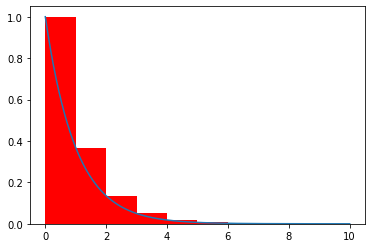

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(x,y,color="red",align="edge",width=1)
x1 = np.linspace(0,10, 1000) # intervalo de 0 a 10, com 1000 divisões
y1=[math.exp(-xi) for xi in x1]
plt.plot(x1,y1)
plt.show()

* Os retângulos acima representam a soma de Riemann pela esquerda ou direita? 

* Se fizermos a soma de Riemann dos retângulos acima, o resultado deveria ser __maior__ ou __menor__ do que a integral analítica? 

In [45]:
x_i = 0
x_f = 10
dx = 1
x = np.arange(x_i,x_f,dx)
S = 0
for xi in x:
    S = S+ math.exp(-xi)*dx # *dx que e 1 nesse caso
    
print("Soma de 10 caixinhas= ",S)

Soma de 10 caixinhas=  1.5819048852379485


In [49]:
x_i = 0
x_f = 10
dx = 0.01
n_steps = round((x_f - x_i)/dx)

x = np.arange(x_i,x_f,dx)

S1= 0
for xi in x:
    S1 = S1+ math.exp(-xi) * dx

print(f"Soma de {n_steps} caixinhas = ",S1)

Soma de 1000 caixinhas =  1.0049627060117017


## Exercícios

1. Quantos intervalos (ou qual largura de intervalo) é preciso implementar para ter uma precisão de 1% no resultado numérico na integração de $f(x)$ de 0 a 10? 

$\dfrac{R_{num}-R_{an}}{R_{an}} \leq 10\% $

2. Faça a integração numérica pela esquerda da mesma função. Compare o resultado com a integração pela direita.

3. Faça a integração por trapézios. Lembre que a área de um trapézio é dada por: $A=\frac{(a + b)h}{2}$

3. Faça a integração numérica das funções trigonométricas $\sin(x)$ e $\cos(x)$ num período $0 < x \leq 2\pi$

4. Faça a integração das funções hiperbólicas  $\sinh(x)$ e $\cosh(x)$ no intervalo $0-10$.

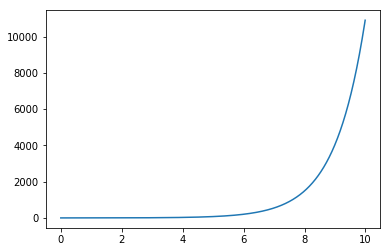

In [ ]:
sh = [math.sinh(xi) for xi in x1]
plt.plot(x1,sh)
plt.show()

### Exercícios extras de resolução numérica de equações diferenciais

1. Imagine que tem um/a maratonista treinando, que num trecho de $5 km$ tem velocidade quase constante de $12 km/h$. Produza uma lista distância percorrida em intervalos de 1 minuto.

1. O/A mesmo/a atleta no seguinte trecho acelera por $200$ metros até chegar em $15 km/h$ por $2 km$. Queremos obter uma tabela ou gráfico da distância percorrida en função do tempo e o tempo total para chegar em $7 km$, faça isto utilizando listas.

1. Considere um péndulo simples num plano. O comprimento da linha é $1$ metro, a massa é $0,2 kg$ e a aceleração de gravidade $9,8 m/s^2$. Faça um gráfico ou crie uma tabela para a posição em coordenadas cartesianas em função do tempo, utilizando listas.


- (opcional) Pesquise sobre o pacote numpy e os objetos desse pacote chamados array, tente utilizálos ao invés de listas para resolver os exercícios.

- (opcional) Pesquise sobre o pacote scipy e seu modulo integrate para resolver integrações ou equações diferenciais numéricamente.
